In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/A_test.jpg
/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/E_test.jpg
/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/L_test.jpg
/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/N_test.jpg
/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/S_test.jpg
/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/D_test.jpg
/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/G_test.jpg
/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/I_test.jpg
/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/W_test.jpg
/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/M_test.jpg
/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/nothing_test.jpg
/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/X_test.jpg
/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/H_test.jpg
/kaggle/input/asl-alphabet/asl_a

## Download and explore the dataset

In [3]:
import os 

train_dir = "/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train"

letter_labels = sorted(os.listdir(train_dir))

print('Labels: \n', letter_labels)

Labels: 
 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [33]:
import cv2
import numpy as np 

IMG_WIDTH = 64
IMG_HEIGHT = 64

def load_images(directory): 
    imgs = []
    lbls = []
    
    for i, lab in enumerate(letter_labels): 
        
        for file in os.listdir(f"{directory}/{lab}"):
            
            filepath = f"{directory}/{lab}/{file}"
            image = cv2.imread(filepath)
            image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
            imgs.append(image)
            lbls.append(i)

    imgs = np.array(imgs)
    lbls = np.array(lbls)
    
    return (imgs, lbls)

def load_test(directory): 
    imgs = []
    lbls = []
    
    files = os.listdir(directory)
    
    for f in files: 
        filepath = f"{directory}/{f}"
        image = cv2.imread(filepath)
        image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
        imgs.append(image)
        letter = f.split("_")[0]
        lbls.append(letter)
    
    return (imgs, lbls)

In [5]:
images, labels = load_images(train_dir)
print('Data loaded successfully!')

Data loaded successfully!


In [6]:
print(len(images))
print(len(labels))

87000
87000


In [7]:
shape = images.shape
print(f"There are {shape[0]} images of {shape[1]} x {shape[2]} with {shape[3]} channels")

There are 87000 images of 64 x 64 with 3 channels


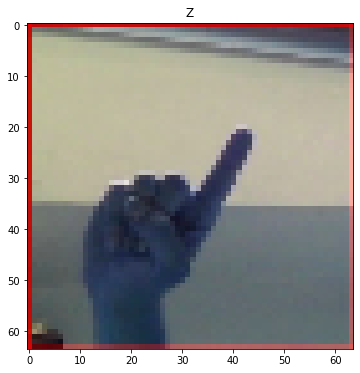

In [8]:
# Show a random image
import random 
from matplotlib import pyplot as plt

rand_ind = random.randint(0, len(labels))
rand_img = images[rand_ind]
rand_lab = letter_labels[labels[rand_ind]]

plt.figure(figsize=(6, 6))
plt.title(rand_lab)
plt.imshow(rand_img)

In [9]:
rand_img

array([[[229,   1,   1],
        [190,  12,  14],
        [189,  14,  11],
        ...,
        [191,  12,  12],
        [193,  12,  16],
        [217,  12,  17]],

       [[193,  16,  11],
        [114, 118, 108],
        [112, 115, 112],
        ...,
        [ 60,  53,  63],
        [ 67,  52,  60],
        [132,  51,  53]],

       [[191,  18,   9],
        [155, 158, 134],
        [154, 157, 130],
        ...,
        [ 64,  63,  81],
        [ 70,  62,  77],
        [138,  53,  59]],

       ...,

       [[192,   9,   6],
        [ 41,  26,  22],
        [ 42,  23,  22],
        ...,
        [ 93, 112, 112],
        [ 91, 110, 112],
        [169,  99,  96]],

       [[196,  10,   7],
        [ 55,  35,  40],
        [ 51,  33,  34],
        ...,
        [ 95, 107, 109],
        [ 99, 109, 114],
        [170,  99,  97]],

       [[210,   4,   5],
        [ 94,   5,  10],
        [ 93,   7,   8],
        ...,
        [170, 101, 100],
        [171, 101, 101],
        [216,  91,  87]]

In [10]:
def show_images(images_list): 
    cols = 8
    rows = 4
    n = int(len(images_list) / len(letter_labels))
    fig = plt.figure(figsize=(24, 12))
    
    for i in range(len(letter_labels)): 
        ax = plt.subplot(rows, cols, i+1)
        plt.imshow(images_list[int(n*i)])
        plt.title(letter_labels[i])
        ax.axis("off")
        
    plt.show()

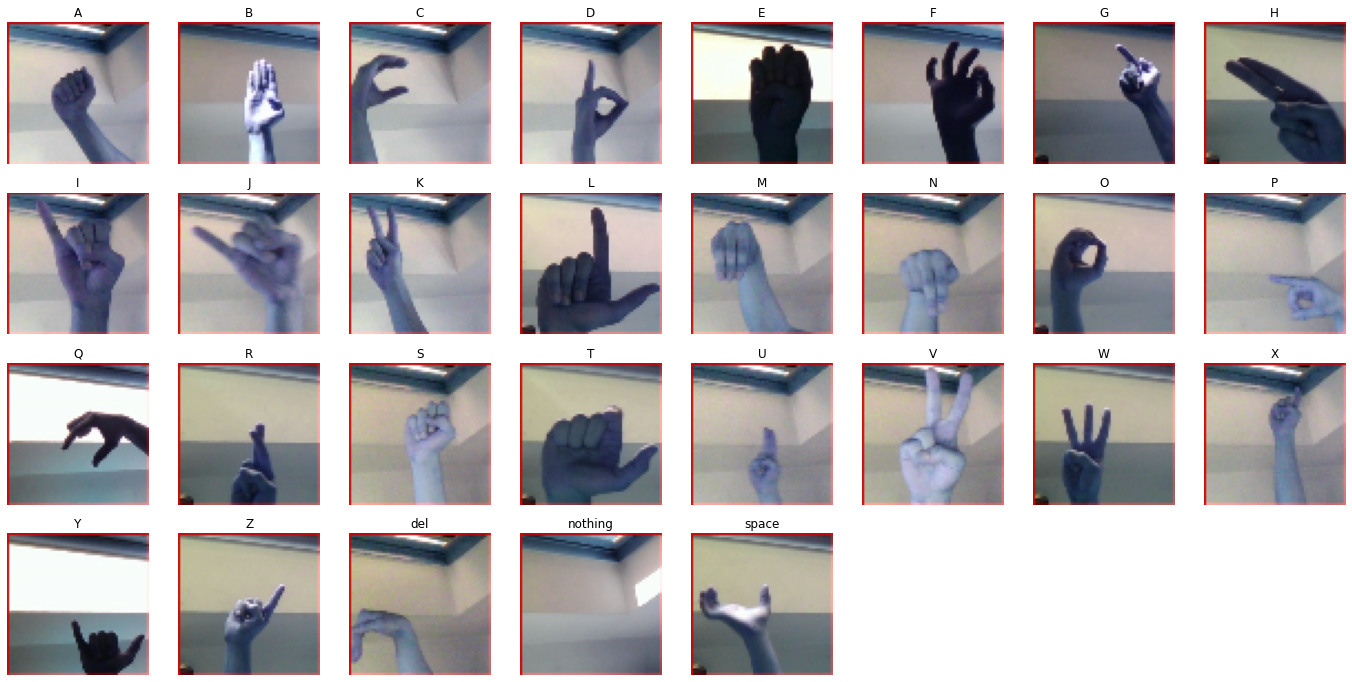

In [11]:
show_images(images)

## Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, stratify=labels)

print("Training images: ", len(y_val))
print("Testing images: ", len(y_test))

Training images:  17400
Testing images:  17400


## Neural Network Model

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 

num_classes = len(letter_labels)

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)), 
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(), 
    layers.Dense(128, activation="relu"), 
    layers.Dense(len(letter_labels), activation="softmax")
])

In [19]:
model.compile(
    optimizer = "adam", 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)         

## Train the model

In [21]:
epochs = 20

history = model.fit(
    x = X_train, 
    y = y_train, 
    validation_data = (X_val, y_val), 
    epochs = epochs,
    batch_size = 64
)

Epoch 1/20
1088/1088 [==============================] - 145s 132ms/step - loss: 1.8462 - accuracy: 0.4553 - val_loss: 0.3007 - val_accuracy: 0.9021
Epoch 2/20
1088/1088 [==============================] - 145s 133ms/step - loss: 0.2182 - accuracy: 0.9276 - val_loss: 0.0866 - val_accuracy: 0.9701
Epoch 3/20
1088/1088 [==============================] - 145s 133ms/step - loss: 0.0986 - accuracy: 0.9671 - val_loss: 0.0917 - val_accuracy: 0.9687
Epoch 4/20
1088/1088 [==============================] - 146s 134ms/step - loss: 0.0703 - accuracy: 0.9763 - val_loss: 0.0283 - val_accuracy: 0.9913
Epoch 5/20
1088/1088 [==============================] - 145s 133ms/step - loss: 0.0513 - accuracy: 0.9837 - val_loss: 0.0290 - val_accuracy: 0.9906
Epoch 6/20
1088/1088 [==============================] - 146s 134ms/step - loss: 0.0409 - accuracy: 0.9875 - val_loss: 0.0163 - val_accuracy: 0.9957
Epoch 7/20
1088/1088 [==============================] - 148s 136ms/step - loss: 0.0350 - accuracy: 0.9887 - val_

In [27]:
history.history

{'loss': [1.0290403366088867,
  0.17997515201568604,
  0.09053029865026474,
  0.06122307479381561,
  0.050858933478593826,
  0.03890138491988182,
  0.03394157811999321,
  0.030497008934617043,
  0.024744926020503044,
  0.023550067096948624,
  0.02307971566915512,
  0.01705671101808548,
  0.02189515344798565,
  0.015429547056555748,
  0.017215585336089134,
  0.016043735668063164,
  0.013042078353464603,
  0.014744329266250134,
  0.01359231024980545,
  0.01099038403481245],
 'accuracy': [0.6860632300376892,
  0.9401724338531494,
  0.96966952085495,
  0.979540228843689,
  0.9832471013069153,
  0.9876436591148376,
  0.989022970199585,
  0.9901580214500427,
  0.9924712777137756,
  0.9924138188362122,
  0.9923850297927856,
  0.9946839213371277,
  0.9925143718719482,
  0.9953017234802246,
  0.9948850870132446,
  0.9950718283653259,
  0.9955890774726868,
  0.9954741597175598,
  0.9958620667457581,
  0.9966810345649719],
 'val_loss': [0.30069494247436523,
  0.086641825735569,
  0.09170160442590

Text(0.5, 1.0, 'Training and validation loss')

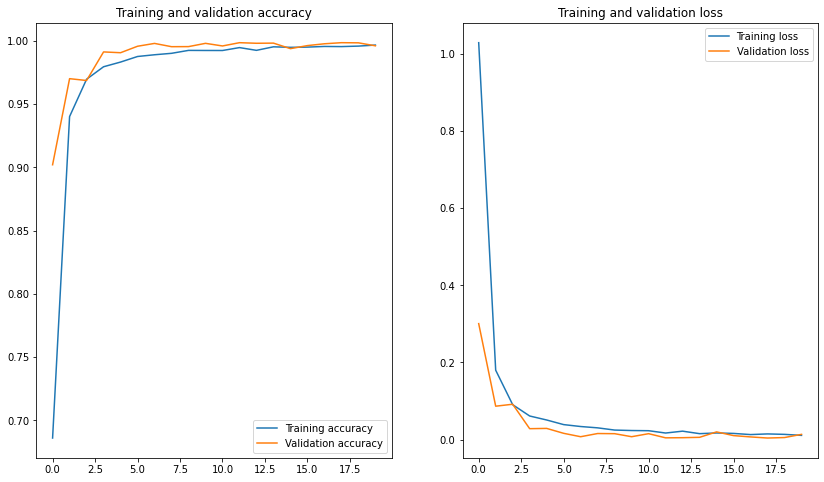

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label="Training accuracy")
plt.plot(epochs_range, val_acc, label="Validation accuracy")
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training loss")
plt.plot(epochs_range, val_loss, label="Validation loss")
plt.legend(loc='upper right')
plt.title('Training and validation loss')

## Make predictions

In [35]:
# Load test data
test_dir = "/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test"

test_images, test_labels = load_test(test_dir)
print('Data loaded successfully!')

Data loaded successfully!


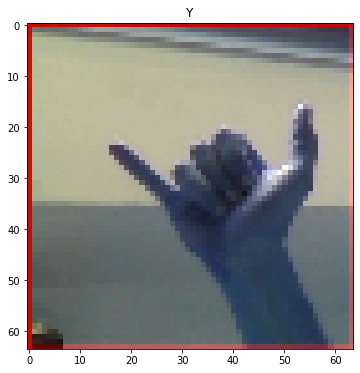

In [38]:
rand_ind = random.randint(0, len(test_labels))
rand_test_img = test_images[rand_ind]
rand_test_lab = test_labels[rand_ind]

plt.figure(figsize=(6, 6))
plt.title(rand_test_lab)
plt.imshow(rand_test_img)

In [42]:
rand_test_img.shape

(64, 64, 3)

In [48]:
test_images = np.array(test_images)
test_images.shape

(28, 64, 64, 3)

In [54]:
predictions = model.predict(test_images)
asserted = 0 

for i, p in enumerate(predictions): 
    max_prob = np.argmax(p)
    print("-" * 20)
    print(f"This image most likely belongs to {letter_labels[max_prob]}")
    print("With a probability of: {:.2f}%".format(max_prob))
    print(f"This actually belongs to: {test_labels[i]}")
    
    if test_labels[i] == letter_labels[max_prob]: 
        asserted += 1

--------------------
This image most likely belongs to A
With a probability of: 0.00%
This actually belongs to: A
--------------------
This image most likely belongs to E
With a probability of: 4.00%
This actually belongs to: E
--------------------
This image most likely belongs to L
With a probability of: 11.00%
This actually belongs to: L
--------------------
This image most likely belongs to N
With a probability of: 13.00%
This actually belongs to: N
--------------------
This image most likely belongs to S
With a probability of: 18.00%
This actually belongs to: S
--------------------
This image most likely belongs to D
With a probability of: 3.00%
This actually belongs to: D
--------------------
This image most likely belongs to G
With a probability of: 6.00%
This actually belongs to: G
--------------------
This image most likely belongs to I
With a probability of: 8.00%
This actually belongs to: I
--------------------
This image most likely belongs to W
With a probability of: 22.00

In [56]:
pr = asserted / len(test_labels)

print(f"Positive rate: {pr * 100}%")

Positive rate: 100.0%


## Save the model

In [28]:
model.save("neural_network.h5")